Engy-5140: Chemical and Nuclear Waste Processing Fall 2019 UMass Lowell; Prof. V. F. de Almeida **08Oct2019**

# 03. Gas Absorption/Stripping

---

## Table of Contents
* [Gas Absorption Theory](#gasabsorption)
* [Equilibrium Gas Stripping Example](#equgasstripproblem)
* [Non-equilibrium Gas Stripping Example](#nequgasstripproblem)
---

## Gas Absorption<a id="gasabsorption"></a>

In-class course notes OneNote [Engy-5140-gas-absorption](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EqcWsUxiWF5HpZtAui06pSgBIPMNorxebuwNt7Lsr-DMdQ?e=NSm120).

In-class course notes OneNote [Engy-5140-noneq-absorption](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EgwN25gp8ytGpdRItJdVRf4B7s_LLH76ODb7f6lSscvMCg?e=LqhrPg).

## Equilibrium Gas Stripping Problem<a id="equgasstripproblem"></a>

Equilibrium gas stripping example [Engy-5140-gas-stripping-example](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/El-5RzsgMN1Hokhp17YslvkB_SMF7DWPXcqODivLNxdKFw?e=DHShm4).

Groundwater supply is contaminated with 1,1-dichloroethane at 900$\mu$g/L; this must be reduced to 22$\mu$g/L by an air stripping column. 

Data provided:

- $T = 20$ C
- $f_\text{L} = 6.2$ L/s
- $\frac{f_\text{G}}{f_\text{L}} = 17$  
- Henry's constant: $H = \exp(A - \frac{B}{T})$
  + $A = 8.64$
  + $B = 4.13\ 10^{3}$ K
  + $T$ [=] K
  + $H$ [=] atm m$^3$ / mol

Clearly address the following:
 1. Compute the stripping factor.
 1. Compute accurately (in tabular form) the number of equilibrium contact stages needed in countercurrent flow (air flowing upward and  liquid flowing downward).
 1. Show your calculation graphically.
 1. Comment on the toxicity of 1,1-dichloroethane in relation to your computed concentration values and cite your source of toxicity information.

Answer to 1:

In [1]:
'''Air stripping of 1,1-dichloroethane from water'''

# Preliminaries
import math
import pandas as pd
import scipy.constants as const

# SI units conversion
second     = 1.0
meter      = 1.0
mol        = 1.0
liter      = const.liter
micro_gram = const.micro * const.gram
atm        = const.atm
ug_per_liter = micro_gram/liter

# Parameters
temp_c = 20
temp = const.convert_temperature(temp_c,'C','K')

f_l           = 6.3 * liter/second
f_g_f_l_ratio = 17
f_g           = f_l * f_g_f_l_ratio

a_param = 8.64
b_param = 4.13e3
henry_cte = math.exp(a_param - b_param/temp) * atm*meter**3/mol

partition_coef = henry_cte/const.gas_constant/temp

# Stripping factor
strip_factor = f_g_f_l_ratio / partition_coef**-1

print('Stripping factor = %5.3f'%strip_factor)

Stripping factor = 3.041


Answer to 2:

In [2]:
'''Air stripping of 1,1-dichloroethane from water'''

# Top of tower
rho_A_L_N1 = 900 * ug_per_liter

# Bottom of tower
rho_A_G_0 = 0.0
rho_A_L_1 = 22 * ug_per_liter

# Overall mass balance
rho_A_G_N1 = ( rho_A_L_N1 - rho_A_L_1 ) / f_g_f_l_ratio

# Equilibrium line definition: y = a x
eq_func = lambda x: partition_coef * x

# Operating line definition: x = a y + b
op_slope = strip_factor * partition_coef**-1
b = rho_A_L_1  # intercept point
op_func = lambda y: op_slope * y + b

# Data storage for graphical output
xpts = list() # x coord. for solution plotting
ypts = list() # y coord. for solution plotting
xpts.append(rho_A_L_1)
ypts.append(rho_A_G_0)

# Data storage for a table output
data = dict()
data['k']            = list()
data['rho_A_L(k)']   = list()
data['rho_A_G(k)']   = list()
data['rho_A_L(k+1)'] = list()

# Solve for mass concentrations in the network tower
# Start at the bottom and move towards the top

rho_A_L_k = rho_A_L_1
rho_A_G_k = rho_A_G_0

k_node = 0
while rho_A_G_k <= rho_A_G_N1:
    
    data['rho_A_L(k)'].append(rho_A_L_k/ug_per_liter)
    
    # Compute equilibrium point
    rho_A_G_k = eq_func(rho_A_L_k)
    
    xpts.append(rho_A_L_k/ug_per_liter)
    ypts.append(rho_A_G_k/ug_per_liter)
    
    data['rho_A_G(k)'].append(rho_A_G_k/ug_per_liter)
    
    # Compute operating line point
    rho_A_L_k = op_func(rho_A_G_k) # overwrite k with k+1
    
    xpts.append(rho_A_L_k/ug_per_liter)
    ypts.append(rho_A_G_k/ug_per_liter)
    
    data['rho_A_L(k+1)'].append(rho_A_L_k/ug_per_liter)
    
    k_node += 1
    
    data['k'].append(k_node)

n_eq_stages = k_node

print('Number of equilibrium stages = ',n_eq_stages)

import pandas as pd
pd.set_option('display.float_format', '{:.2F}'.format)

df = pd.DataFrame(data)
print('')
print('Mass Concentrations [ug/L] at T = %2.2f'%const.convert_temperature(temp,'K','C'))
print(df)

Number of equilibrium stages =  3

Mass Concentrations [ug/L] at T = 20.00
   k  rho_A_L(k)  rho_A_G(k)  rho_A_L(k+1)
0  1       22.00        3.94         88.91
1  2       88.91       15.91        292.39
2  3      292.39       52.31        911.24


A quote on computing:

    "If we can't express what we know in the form of numbers, we really don't know much about it"

Lord Kelvin

Answer to 3:

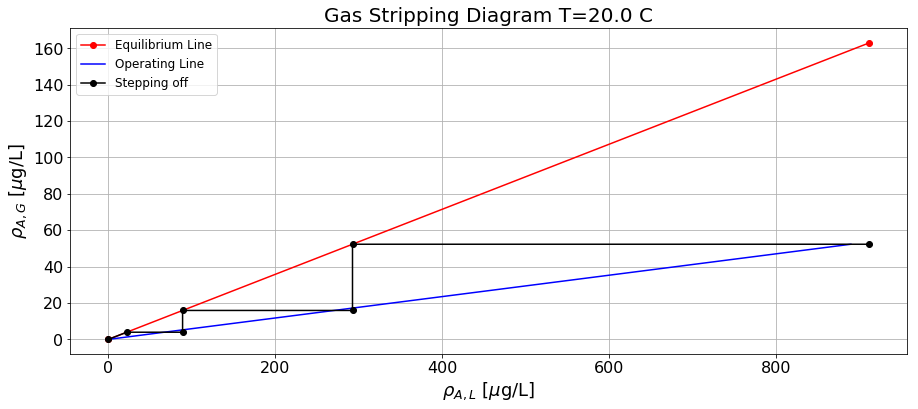

In [4]:
def plot_diagram(xpts,ypts):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(1, figsize=(15, 6))

    xpts = np.array(xpts)
    ypts = np.array(ypts)

    # plot equilibrium line
    plt.plot( (0,xpts.max()), (0,eq_func(xpts.max())),'ro-',label='Equilibrium Line')
    
    # plot operating line
    plt.plot(op_func(ypts), ypts,'b',label='Operating Line')

    # plot network nodes
    plt.plot(xpts, ypts, 'ko-',label='Stepping off')

    plt.xlabel(r'$\rho_{A,L}$ [$\mu$g/L]',fontsize=18)
    plt.ylabel(r'$\rho_{A,G}$ [$\mu$g/L]',fontsize=18)
    plt.title(r'Gas Stripping Diagram T=%2.1f C'%const.convert_temperature(temp,'K','C'),fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.grid()
    plt.show()
    print('')
    
plot_diagram(xpts,ypts)

Answer to 4:

Health hazard from 1,1-dichloroethane can be found in the EPA website:
[2000 EPA Health Effects Notebook for Hazardous Air Pollutants for Ethylidene Dichloride (1,1-Dichloroethane)](https://www.epa.gov/sites/production/files/2016-09/documents/ethylidene-dichloride.pdf)

|**Information** |**Dose**|
|:----------------------|:-------:|
| Volatile organic compound  | -  |
| Acute inhalation exposure to high levels in humans results in central nervous system depression and cardio arrythmias| 105 mg/L |
| EPA classification as Group C, possible human carcinogen | - |
| EPA provisional reference concentration| 0.5 $\mu$g/L |
| Lethal conc. in 50% of population (mice)   | 70 mg/L |
| Lethal conc. in 50% of population (rats)   | 65 mg/L |
| National institute of occupational safety and health (NIOSH) **immediately dangerous** to life or health limit| 12 mg/L |
| NIOSH recommend exposure 8-10 h | 400 $\mu$g/L |

## Non-Equilibrium Gas Stripping Example<a id="nequgasstripproblem"></a>

Repeat the [equilibrium problem above](#equgasstripproblem) for a non-equilibrium situation where the efficiency is 75.3%.

Clearly address the following:
 1. Compute the stripping factor.
 1. Compute accurately (in tabular form) the number of equilibrium contact stages needed in countercurrent flow (air flowing upward and  liquid flowing downward).
 1. Show your calculation graphically.
 1. Compare your number of stages to the number of stages obtained from the equilibrium calculation divided by the efficiency.

In [9]:
'''Air stripping of 1,1-dichloroethane from water'''

efficiency = 75.3/100

relax_factor = (1/efficiency - 1)/strip_factor
relax_factor_hat = relax_factor/(relax_factor+1)

print('Gas-phase relaxation factor            = %2.3f'%relax_factor)
print('Gas-phase normalized relaxation factor = %2.3f'%relax_factor_hat)

# Non-equilibrium line: x = a y + b
neq_slope = partition_coef**-1 * ( 1 + relax_factor_hat*(strip_factor - 1) )
b_neq = rho_A_L_1 * relax_factor_hat # intercept point
neq_func = lambda x: neq_slope**-1 * ( x - b_neq )

# Data storage for graphical output
xpts = list() # x coord. for solution plotting
ypts = list() # y coord. for solution plotting
xpts.append(rho_A_L_1)
ypts.append(rho_A_G_0)

# Data storage for a table output
data = dict()
data['k']            = list()
data['rho_A_L(k)']   = list()
data['rho_A_G(k)']   = list()
data['rho_A_L(k+1)'] = list()

# Solve for mass concentrations in the network tower
# Start at the bottom and move towards the top

rho_A_L_k = rho_A_L_1
rho_A_G_k = rho_A_G_0

k_node = 0
while rho_A_G_k <= rho_A_G_N1:
    
    data['rho_A_L(k)'].append(rho_A_L_k/ug_per_liter)
    
    # Compute the non-equilibrium point
    rho_A_G_k = neq_func(rho_A_L_k)
    
    xpts.append(rho_A_L_k/ug_per_liter)
    ypts.append(rho_A_G_k/ug_per_liter)
    
    data['rho_A_G(k)'].append(rho_A_G_k/ug_per_liter)
    
    rho_A_L_k = op_func(rho_A_G_k) # overwrite k with k+1
    
    xpts.append(rho_A_L_k/ug_per_liter)
    ypts.append(rho_A_G_k/ug_per_liter)
    
    data['rho_A_L(k+1)'].append(rho_A_L_k/ug_per_liter)
    
    k_node += 1
    
    data['k'].append(k_node)

n_neq_stages = k_node
    
print('Number of non-equilibrium stages = ',n_neq_stages)

import pandas as pd
pd.set_option('display.float_format', '{:.2F}'.format)

df = pd.DataFrame(data)
print('')
print('Mass Concentrations [ug/L] at T = %2.2f'%const.convert_temperature(temp,'K','C'))
print(df)

print('')
print('# equilibrium stages / efficiency = %i'%round(n_eq_stages/efficiency,0))

Gas-phase relaxation factor            = 0.108
Gas-phase normalized relaxation factor = 0.097
Number of non-equilibrium stages =  4

Mass Concentrations [ug/L] at T = 20.00
   k  rho_A_L(k)  rho_A_G(k)  rho_A_L(k+1)
0  1       22.00        2.96         72.38
1  2       72.38       10.48        200.20
2  3      200.20       29.56        524.49
3  4      524.49       77.96       1347.24

# equilibrium stages / efficiency = 4


,k,rho_A_L(k),rho_A_G(k),rho_A_L(k+1)
0,1,22.00,2.96,72.38
1,2,72.38,10.48,200.20
2,3,200.20,29.56,524.49
3,4,524.49,77.96,1347.24


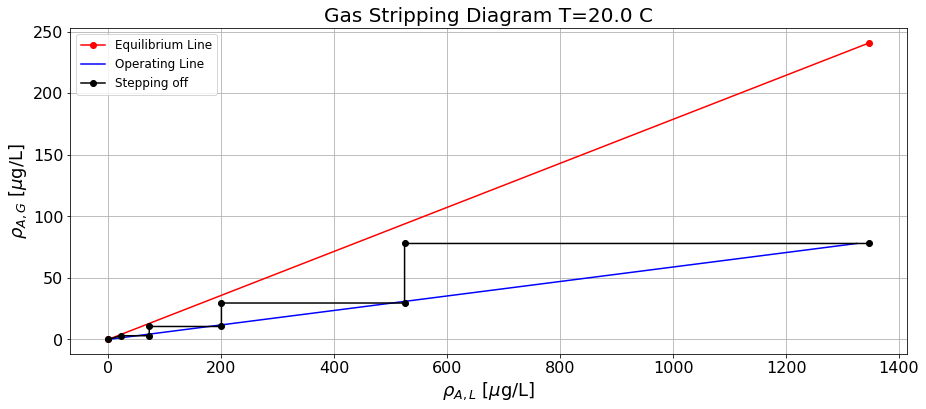

In [6]:
plot_diagram(xpts,ypts)